In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from skimage.io import imread
from skimage.io import imsave


from scipy import ndimage, misc
ascent = misc.ascent()


(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f217d80eeb8>)

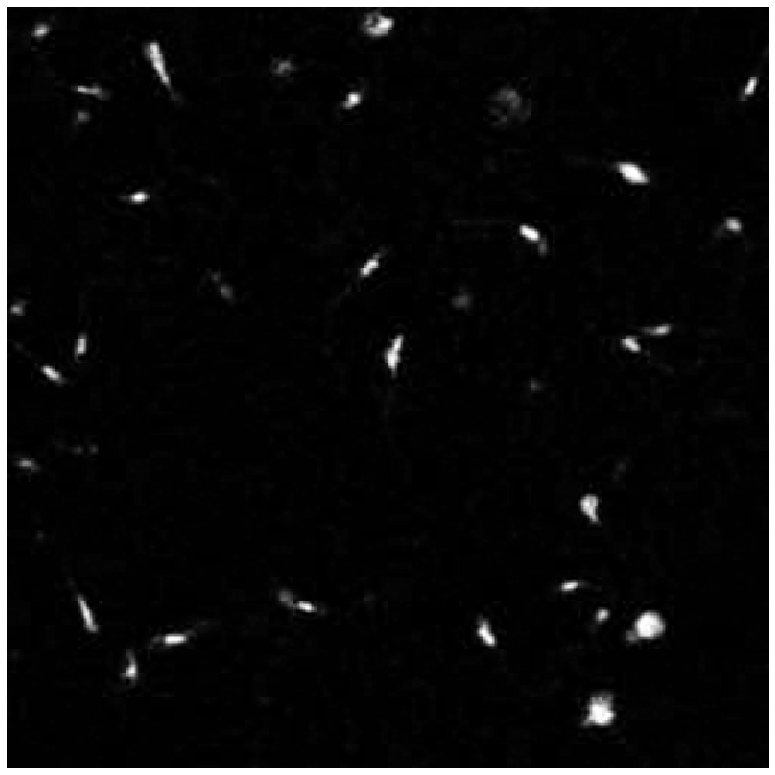

In [11]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax


test_image = imread('IMAGENES/sample.jpg')


image_show(test_image[:, :, 0])


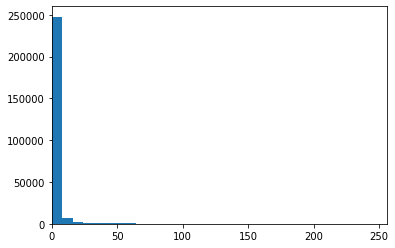

In [14]:
fig, ax = plt.subplots(1, 1)
ax.hist(test_image[:, :, 0].ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);

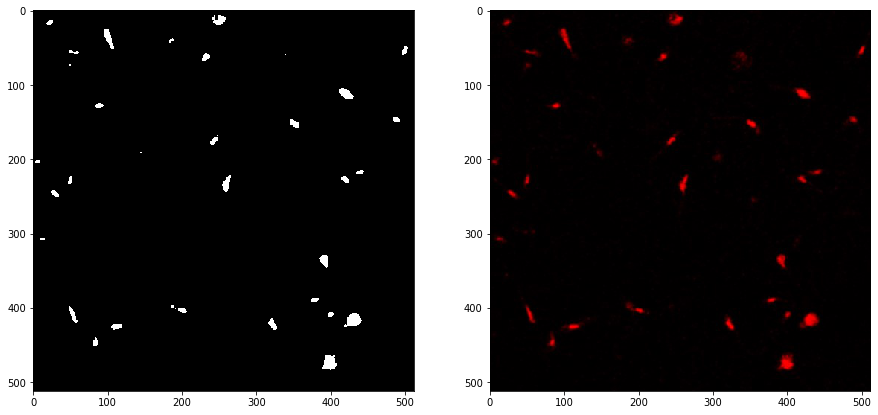

In [37]:
aux = test_image[:, :, 0]>50
plt.figure(figsize= (15,15))
plt.subplot(121)
plt.imshow(test_image[:, :, 0] > test_image_threshold, cmap='gray')
plt.subplot(122)
plt.imshow(test_image)

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f217cb51978>)

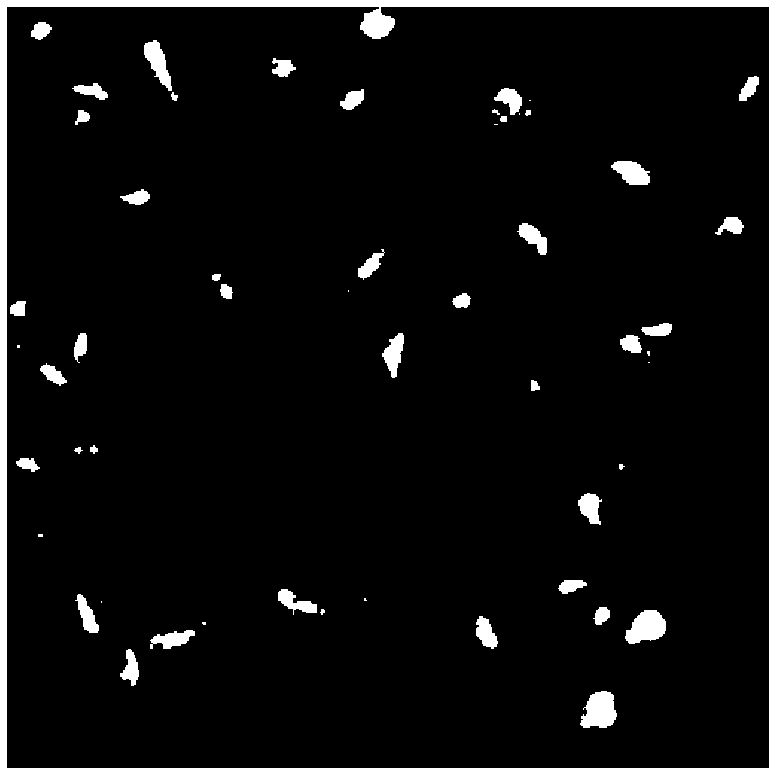

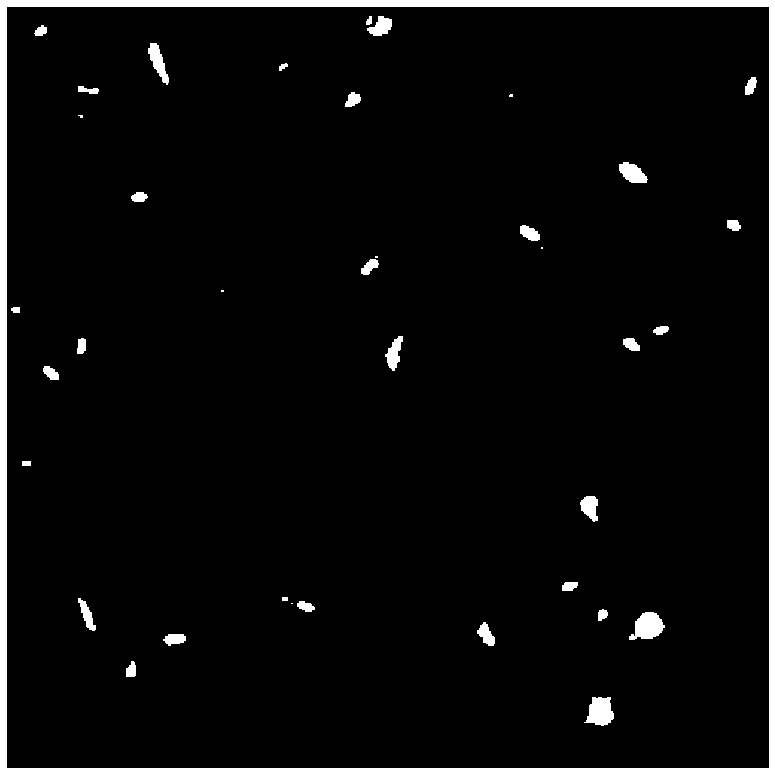

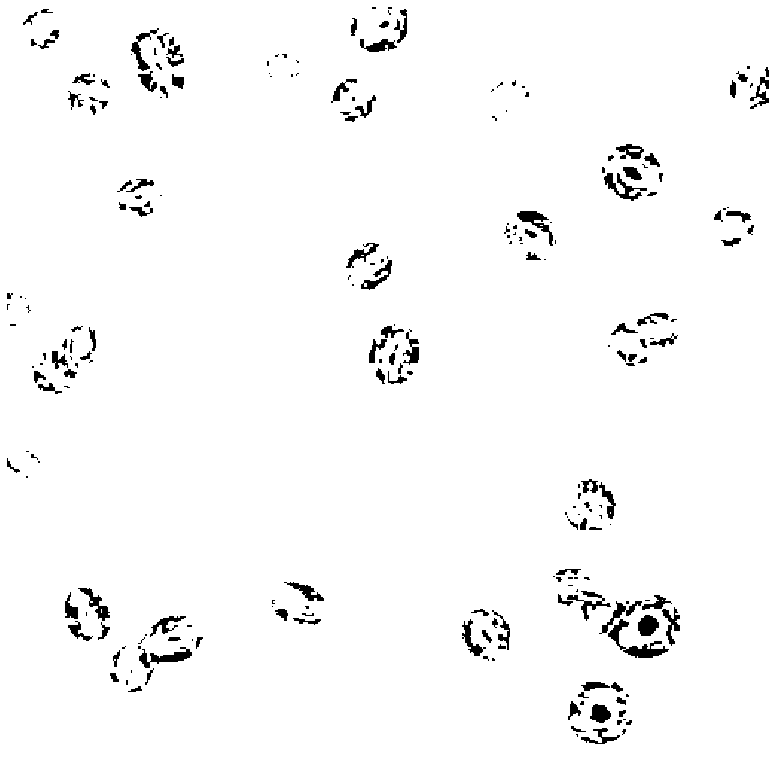

In [42]:
test_image_threshold = filters.threshold_li(test_image[:, :, 0]) 
image_show(test_image[:, :, 0] > test_image_threshold)
test_image_threshold = filters.threshold_otsu(test_image[:, :, 0]) 
image_show(test_image[:, :, 0] > test_image_threshold)
test_image_threshold = filters.threshold_local(test_image[:, :, 0],block_size=51, offset=10) 
image_show(1-test_image[:, :, 0] > test_image_threshold)

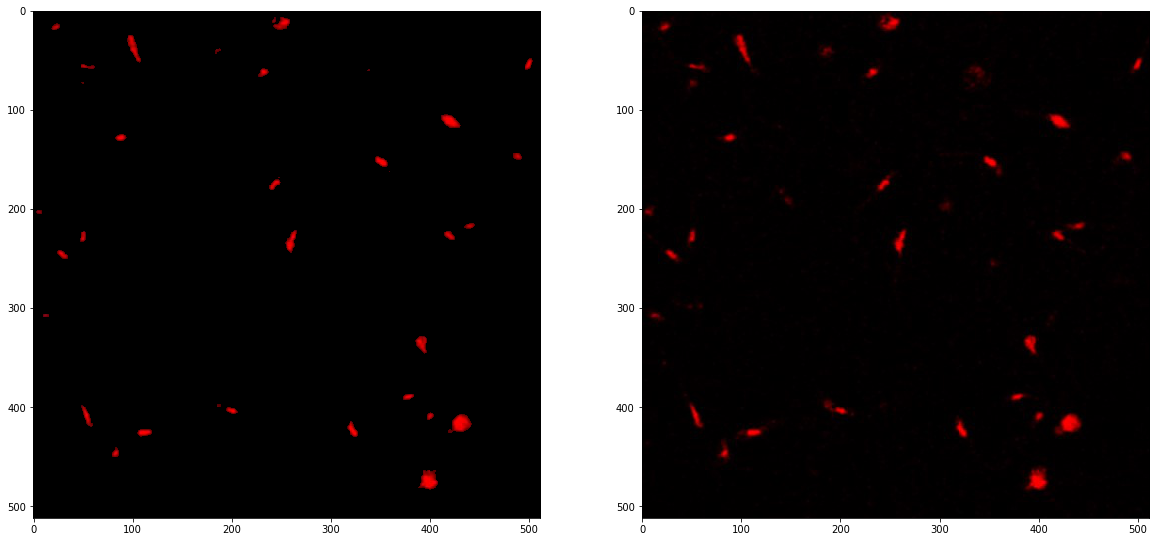

In [57]:
test_image_threshold = filters.threshold_otsu(test_image[:, :, 0]) 
mask = test_image[:, :, 0] > test_image_threshold
result_image = test_image.copy()
result_image[:,:,0], result_image[:,:,1], result_image[:,:,2] = mask*result_image[:,:,0], mask*result_image[:,:,1], mask*result_image[:,:,2]

plt.figure(figsize= (20,20))
plt.subplot(121)
plt.imshow(result_image)
plt.subplot(122)
plt.imshow(test_image)